<a href="https://colab.research.google.com/github/maxstclair/DS4002/blob/main/EDA_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MI2 script containing code for initial EDA.

Set Up

In [ ]:
! git clone https://github.com/maxstclair/DS4002

Cloning into 'DS4002'...
remote: Enumerating objects: 881, done.
remote: Counting objects: 100% (172/172), done.
remote: Compressing objects: 100% (151/151), done.
remote: Total 881 (delta 52), reused 7 (delta 7), pack-reused 709 (from 1)
Receiving objects: 100% (881/881), 9.78 MiB | 6.07 MiB/s, done.
Resolving deltas: 100% (318/318), done.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/DS4002/Project_2/DATA/load_temp_wind_df.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,UTC Timestamp (Interval Ending),Local Date,Hour Number,MISO Total Actual Load (MW),Indianapolis Temperature (Fahrenheit),Indianapolis Temperature Observation Time (Eastern Standard),Minneapolis Temperature (Fahrenheit),Minneapolis Temperature Observation Time (Eastern Standard),New Orleans International Airport Temperature (Fahrenheit),New Orleans International Airport Temperature Observation Time (Eastern Standard),MISO Total Wind Generation (MW)
0,2021-02-10 06:00:00,2021-02-10,1,77859.97,19.9,2/10/21 0:54,0.0,2/10/21 0:53,64.0,2/10/21 0:53,5376.71
1,2021-02-10 07:00:00,2021-02-10,2,76211.10,19.9,2/10/21 1:54,-0.9,2/10/21 1:53,63.0,2/10/21 1:53,5019.58
2,2021-02-10 08:00:00,2021-02-10,3,75295.06,19.9,2/10/21 2:54,-4.0,2/10/21 2:53,63.0,2/10/21 2:53,4895.51
3,2021-02-10 09:00:00,2021-02-10,4,75164.21,19.9,2/10/21 3:54,-2.0,2/10/21 3:53,63.0,2/10/21 3:53,4747.13
4,2021-02-10 10:00:00,2021-02-10,5,75743.83,19.9,2/10/21 4:54,-2.0,2/10/21 4:53,62.1,2/10/21 4:53,4341.06


EDA

In [ ]:
# about
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32627 entries, 0 to 32626
Data columns (total 11 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   UTC Timestamp (Interval Ending)                                                    32627 non-null  object 
 1   Local Date                                                                         32627 non-null  object 
 2   Hour Number                                                                        32627 non-null  int64  
 3   MISO Total Actual Load (MW)                                                        32384 non-null  float64
 4   Indianapolis Temperature (Fahrenheit)                                              32441 non-null  float64
 5   Indianapolis Temperature Observation Time (Eastern Standard)                       32441 non-null  obj

In [ ]:
df.shape

(32627, 11)

In [ ]:
# summary stats on all variables
df.describe()

,Hour Number,MISO Total Actual Load (MW),Indianapolis Temperature (Fahrenheit),Minneapolis Temperature (Fahrenheit),New Orleans International Airport Temperature (Fahrenheit),MISO Total Wind Generation (MW)
count,32627.000000,32384.000000,32441.000000,32463.000000,32387.000000,32627.000000
mean,12.112177,75580.975418,54.643124,48.074931,71.315148,10818.636523
std,6.703655,11695.271440,19.348815,23.612408,13.162895,5548.514991
min,1.000000,52125.790000,-9.000000,-18.900000,23.000000,-43.610000
25%,6.000000,67409.350000,39.900000,30.900000,63.000000,6189.185000
50%,12.000000,73762.255000,55.900000,48.900000,73.900000,10481.930000
75%,18.000000,81577.535000,71.100000,68.000000,81.000000,15184.945000
max,24.000000,121560.240000,99.000000,100.900000,99.000000,25363.620000


In [ ]:
# convert to datetime
df['UTC Timestamp (Interval Ending)'] = pd.to_datetime(df['UTC Timestamp (Interval Ending)'])

In [ ]:
# entries by year
df['year'] = df['UTC Timestamp (Interval Ending)'].dt.to_period('Y').value_counts()

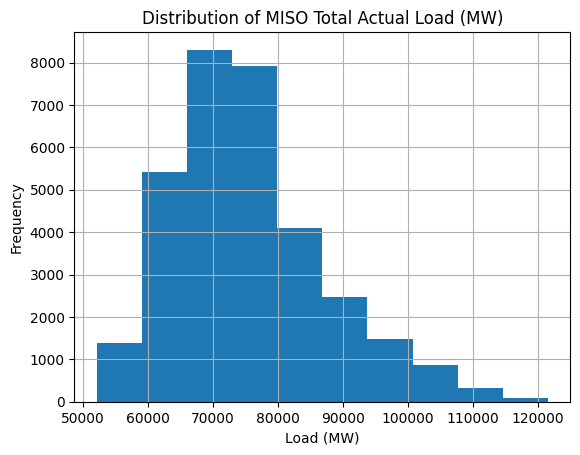

In [ ]:
# load distribution
df['MISO Total Actual Load (MW)'].hist()
plt.title('Distribution of MISO Total Actual Load (MW)')
plt.xlabel('Load (MW)')
plt.ylabel('Frequency')
plt.show()

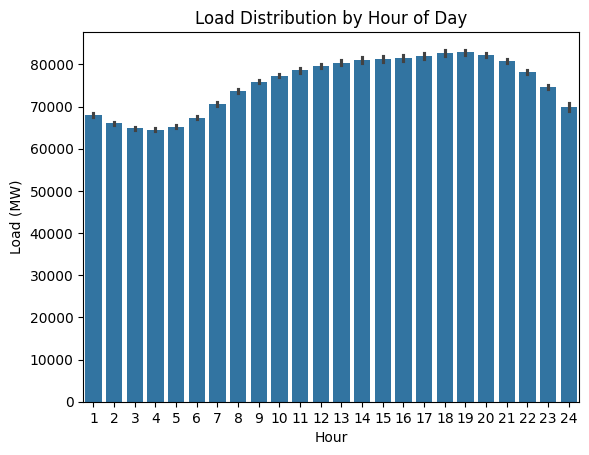

In [ ]:
# load vs hour of day
sns.barplot(x='Hour Number', y='MISO Total Actual Load (MW)', data=df)
plt.title('Load Distribution by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Load (MW)')
plt.show()

In [ ]:
# average load per year
avg_load_per_year = df.groupby(df['UTC Timestamp (Interval Ending)'].dt.to_period('Y'))['MISO Total Actual Load (MW)'].mean()

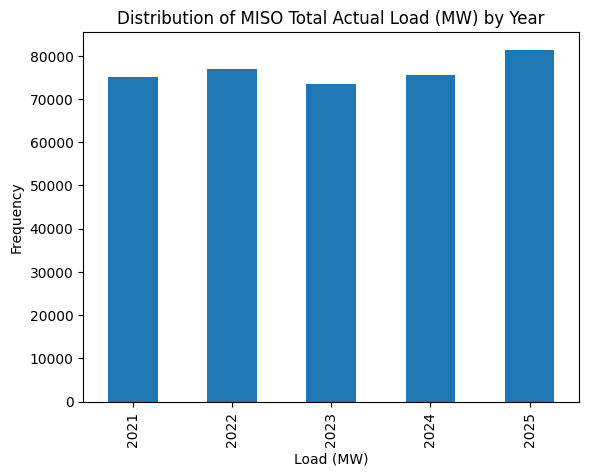

In [ ]:
avg_load_per_year.plot(kind='bar')
plt.title('Distribution of MISO Total Actual Load (MW) by Year')
plt.xlabel('Load (MW)')
plt.ylabel('Frequency')
plt.show()

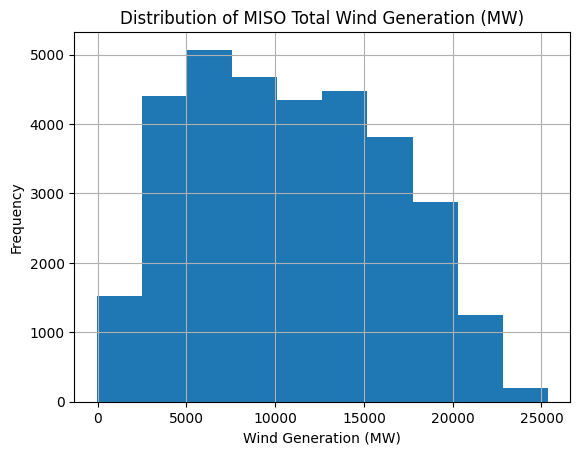

In [ ]:
# wind distribution
df['MISO Total Wind Generation (MW)'].hist()
plt.title('Distribution of MISO Total Wind Generation (MW)')
plt.xlabel('Wind Generation (MW)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# average wind per hour
average_wind = df.groupby('Hour Number')['MISO Total Wind Generation (MW)'].mean()
average_wind

,MISO Total Wind Generation (MW)
Hour Number,
1,11779.788234
2,11694.690974
3,11538.022306
4,11396.034602
5,11271.931543
6,11175.833129
7,11121.034410
8,10894.699595
9,10377.637482


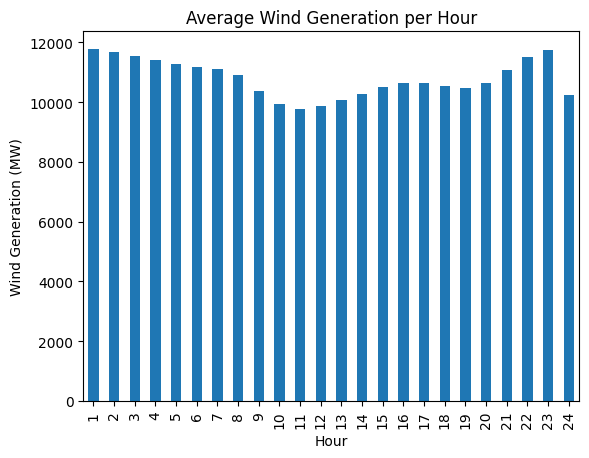

In [ ]:
average_wind.plot(kind='bar')
plt.title('Average Wind Generation per Hour')
plt.xlabel('Hour')
plt.ylabel('Wind Generation (MW)')
plt.show()

In [ ]:
# average load vs wind
average_load_wind = df.groupby('Hour Number')[['MISO Total Actual Load (MW)','MISO Total Wind Generation (MW)']].mean()
average_load_wind

,MISO Total Actual Load (MW),MISO Total Wind Generation (MW)
Hour Number,,
1,67976.776935,11779.788234
2,66049.849448,11694.690974
3,64896.547582,11538.022306
4,64497.025233,11396.034602
5,65197.551943,11271.931543
6,67356.657154,11175.833129
7,70616.677204,11121.034410
8,73748.772373,10894.699595
9,75889.435355,10377.637482


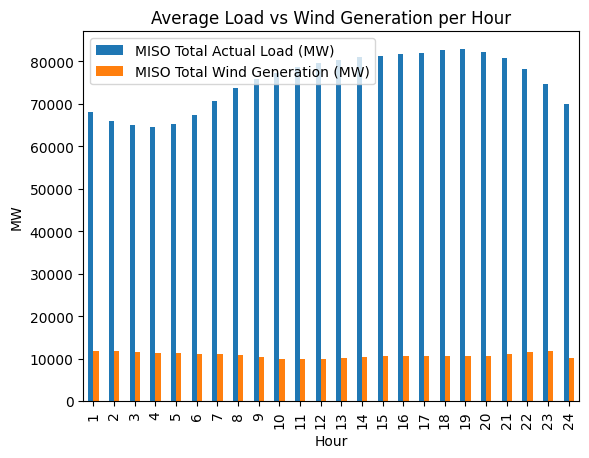

In [ ]:
average_load_wind.plot(kind='bar')
plt.title('Average Load vs Wind Generation per Hour')
plt.xlabel('Hour')
plt.ylabel('MW')
plt.show()

In [ ]:
average_load_wind_month = df.groupby('month')[['MISO Total Actual Load (MW)','MISO Total Wind Generation (MW)']].mean()
average_load_wind_month

,MISO Total Actual Load (MW),MISO Total Wind Generation (MW)
month,,
1,80421.163671,12322.883040
2,78078.654393,13245.922220
3,69650.873442,13101.486280
4,66797.907463,13650.957492
5,70645.087258,10263.785897
6,82675.986058,8316.017439
7,86289.960437,5753.823755
8,86412.063223,6654.966219
9,75904.457315,8534.018917


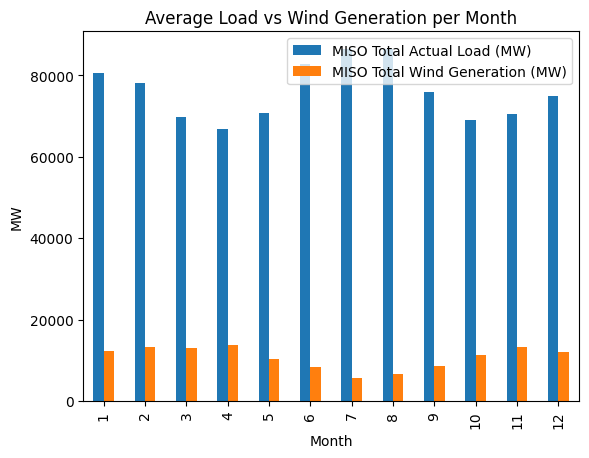

In [ ]:
average_load_wind_month.plot(kind='bar')
plt.title('Average Load vs Wind Generation per Month')
plt.xlabel('Month')
plt.ylabel('MW')
plt.show()

In [ ]:
average_load_wind_year = df.groupby(df['UTC Timestamp (Interval Ending)'].dt.to_period('Y'))[['MISO Total Actual Load (MW)','MISO Total Wind Generation (MW)']].mean()
average_load_wind_year

,MISO Total Actual Load (MW),MISO Total Wind Generation (MW)
UTC Timestamp (Interval Ending),,
2021,75152.031775,9264.073195
2022,76907.347683,11334.989308
2023,73376.164701,10866.579000
2024,75581.539759,11140.318228
2025,81417.111722,14312.448650


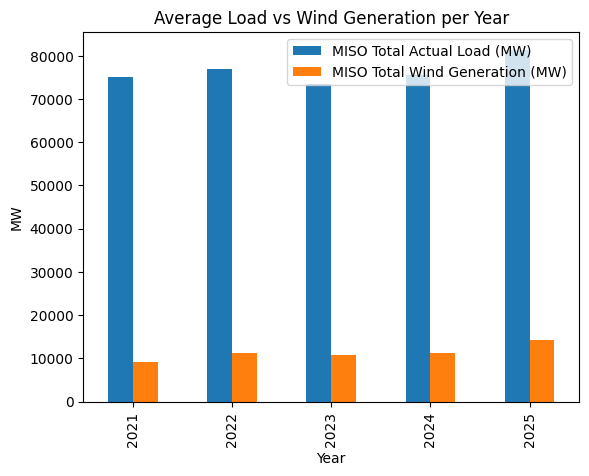

In [ ]:
average_load_wind_year.plot(kind='bar')
plt.title('Average Load vs Wind Generation per Year')
plt.xlabel('Year')
plt.ylabel('MW')
plt.show()